PostId: 2018-10-28-082858
Title:論文読み：Neural Models for Information Retrieval

[arxiv:Neural Models for Information Retrieval](https://arxiv.org/abs/1705.01509)

### 読もうと思った動機

機械学習の勉強会で、USの特許データでこれまで勉強した事を試してみよう、となった。

やりたいのは、ある特許を入力したら、「この特許とかぶってるから駄目だよ」と言われそうな「この特許」を探してくる、というのをとりあえずやろうとしている。
過去のペアは手に入る。

で、せっかくなのでニューラルネットでどうにかしたい。
でも結講長いテキストに対してある種の類似テキストを探してくる、というのをどうやったらいいか分からない。
幾つか思いつく方法はあるが、まずは既存の研究を知っておこう、と思い、とりあえずこの論文を読んで見る。

### 論文の構成

一章の最後に構成が書いてあるのでメモしておこう。

- 2章 IR入門（ニューラルネット以外の部分）
- 3章 ニューラルIRモデルの概要
- 4章 教師なしのembeddingの学習と類似度
- 5章 IRでそのembeddingどう使うかの具体例
- 6章 IRで使われるDeepなモデルの基礎
- 7章 IRでDeepなモデルをどう使うの具体例
- 8章 future workとかdiscussionとか

という感じか。

## 2章 IR全般の話

### Mean average precisionが分からず

定義式4の、$${Precision}_{q, i}$$がなんなのか分からない。
ググって見ると、[What you wanted to know about Mean Average Precision](http://fastml.com/what-you-wanted-to-know-about-mean-average-precision/)というページが引っかかり、
どうもこれはトップからi番目までのprecisionっぽい、という理解に至る。

つまり、以下の式という事かな？

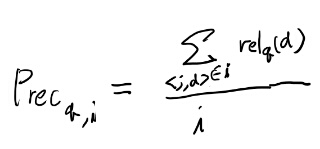

In [1]:
MeatPieImage()

つまりトップiのうち、あたりの数だ。

この式と4式をあわせて考えると、
どうなるんだ？

例えば0番目と2番目が外れて、1番目と3番目が当たる場合を考えると、

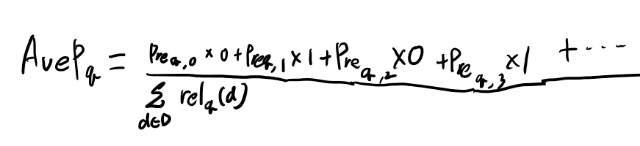

In [1]:
MeatPieImage()

こんな感じか。で、このPrecの3にも1での当たりが含まれるので、最初の方の当たりの方が重みが重くなるのだな。なるほど。

### Normalized discounted cumulative gain

良くわからんので元論文を見ると、著者のホームページで公開されてた。

結果ドキュメントのリストをスコアのリストに置き換えて先頭から累積分布関数みたく足していくのがCumulative Gain。
で、後ろに行くほど価値を割り引いて足し合わせるのがDCGだが、この割引はあんまり急過ぎると、二番目以降の価値を過小評価しすぎるので、ちょっとずつ減衰するのがいいからlogくらい使っとけ、という程度の意味合いらしい。

IDCGは理想的なスコアのリストでこれを計算した物、との事。
元論文ではrelevanceを0から3までのスコアにしてたが、この論文では0, 1を前提にしてるので、1な物をトップの方に全部並べたスコアという事ですね。

### Dependence modelあまりから読み飛ばす事に

キリが無いな、という事で、この辺はどういう物かを眺めるだけに留めて、必要になったら元論文をたどってちゃんと理解する事にしよう。

Dependence modelはなんちゃらwindowのあたりが良く分からないが、n-gramをどうにか使う事で、完全にtermが一致してなくても何か似てれば引っかかるようにする物らしい。

PRFはクエリと関連するドキュメント群を取ったあとに、それらのドキュメントから言語モデルなどを作って最終的に取り出すドキュメント群を探すという二段階の仕組み。 
ノーテーションを確認するとTは全ボキャブラリとの事。

18式ではクエリからtが得られる確率を、R1のドキュメントからクエリの単語が得られる確率で重みづけしたtが得られる確率で補正している。
これとドキュメントの言語モデルとのKLダイバージェンスをスコアとするらしい。

Rank Netはフィーチャーの詳細が分からないから良く分からないが、
クエリに対してドキュメントのフィーチャーが得られて、それをニューラルネットに食わせた結果の差分がrelevancyの大小と同じになるようなトレーニングするらしい。

ネットワークはrelevancyの相対的な大小を反映した数値を出し、それはpariwiseなデータで学習出来る訳だな。

# 4章 embeddingsの話

最初は手作りの分散表現とかsmilarityの話がある。

単語の種類が似ているのをTypicalのsimilarity、トピック的に関連が強いものをTopicalというらしい。
大阪と近いのは東京かタイガースか、みたいな話。
東京はTypical、タイガースはTopical。

で、4.4からembeddingsの話。
word2vecやその亜種の話がいろいろある。

GloVeというのの式変形は良く追えてないが、後で本当に出てきたら戻ってこよう。

いろいろなembeddingsの話があるが、この辺は本当に使うのかちょっと怪しいのでまず先に進む。

# 6章まで読んでみた

なんかなかなか本題に入らないなぁ、という気がする。
embeddingsとか構成要素について、こんなのとこんなのとこんなのがあります、
と言うのがただひたすら続く感じで、
実際につくれるようになる感じが全然しない。

6章はもっとDNNの具体的なアーキテクチャの話があるのかと思ってたけど、かなり一般的なRNNと話しか無い。
ただ、Siamese networksというのが良く使われててどういうものかは分かった。
なんかいまさらCNNとは何か、みたいな話は要らないと思うのだが。

6章まではパラパラめくって「へー、そんなのあるのね」くらいで終わらせるのが良さそう。

7章はようやく具体的な話に入りそうなので読んで見る。

# 7章を読んで

ほとんどトピックの説明と参照しか無くて、
参照してる物がどういう物かの簡単な解説すら無い事が多い。
期待してたのとは違うが、これはこれで役には立つな。

ようするにこの論文はたくさんのこの分野への参照だけの論文で、序盤の細かい指標の話は名前となんとなくだけの理解で十分で、どういう物があるのかだけ知るのが正しい読み方だった模様。

これはチュートリアルとは呼ばないんじゃないか、という気はする。
少なくとも自分のやりたかったドキュメントのペアの教師データがあった時にどう新しい入力に対するドキュメントを取り出すか、というやり方は分からなかった。

ただ、7.3の内容に近いのでリファレンスの141か157を読むと良さそう、というのは分かったし、なんかsliding windowのあるSiamese networksの亜種みたいなのをやってみたいな、とイメージは湧いた。

ニューラルネットの適用よりはそれ以前のIRの知識の方が具体的な話が多く、ニューラルネット側の人にIRの基礎を伝える、みたいな位置づけのドキュメントになってると思う。
ニューラルネットを使ったIRについては参照がメインで、どういうメカニズムなのかは良く分からない。

追記:

141は Learning to Match using Local and Distributed Representations of Text for Web Search.

157はA Study of MatchPyramid Models on Ad-hoc Retrieval.

### 157 A Study of MatchPyramid Models on Ad-hoc Retrieval.

157を軽く読んでみた。ついてに141もちらっと見た。

どちらも短いクエリで長い文書をとってくる、という問題設定になっている。
一方で我々は入力のドキュメントの長さとreject理由にあげられらドキュメントの長さは同じ程度だ。

また、我々は厳密にはsimilarityが知りたい訳では無い。
入力の文書を与えて、reject理由に挙げられるであろう文書を予測したい。
これは理論上は、似てないが挙げられる物もありえる（実際は無いだろうが）。
だから求めたいのは条件付き期待値なのだよな。

MatchingPyramidは、クエリの単語の位置を行、ドキュメントの単語の位置を列として、要素にはその単語同士の類似度を置く。

類似度なので2つの単語のペアが一つの数字になるので、次元としては単語の数に抑えられる訳だが、各要素の類似度は計算しないといけない。
クエリの単語が小さいのと、クエリで取り出すという問題設定から厳密一致で良いからこそのモデルだろう。

で、この行列を画像と同じようにCNNを食わす。

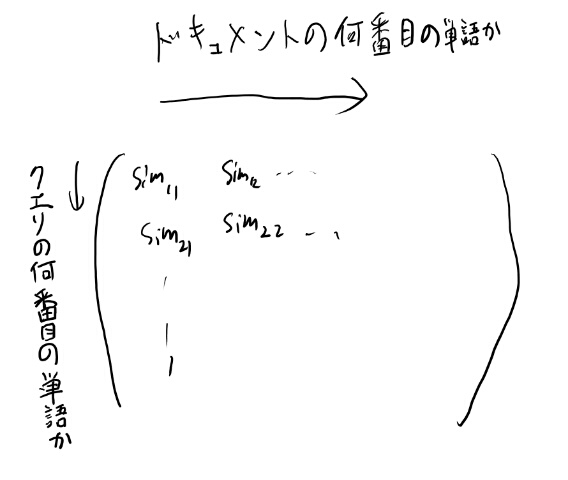

In [1]:
MeatPieImage()

MatchingPyramidはアイデアはこんな感じで良いと思う。
ただスケールしなさそうなので我らのデータセットでは多すぎる気がする。

各単語の類似度を行列とする、って500語だとしても500x500要素だよ。これを2000x2000のドキュメントの組でやるとか無理そう。

クエリが短いという前提のモデルが多いよなぁ。
DSSMはクエリとタイトルの一致だし。
もっとドキュメント全体を見たいものだが。

長いドキュメントをどう扱うか、という視点で見てみるか。

## 141 Learning to Match using Local and Distributed Representations of Text for Web Search.

[https://arxiv.org/abs/1610.08136](https://arxiv.org/abs/1610.08136)

こちらは単語の単純なマッチと、DNNっぽいモデルを2つつなげるduetというモデル。

### 単純なマッチのモデル

単純なマッチは前出のMatchPyramidのsimilarity をidentity（同一なら1、違ったら0）にした物をCNNに食わせるっぽい。
なおこの論文ではこの行列はinteraction matrixと言ってる。

### DNNっぽいモデル

DNNっぽい方は単語をn-graphs表現というのにしている。
n-graphsってなんだろ。n-gramっぽいが。

1-gram, 2-gram, 3-gram...とそれぞれ存在する物を1として、上位2000のn-graphsを残してこの2000次元の0-1のベクトルで単語を表すのかな。

で、こいつをCNNに食わせて、10語のクエリを300x1に、1000語のドキュメントを300x899の行列にしている。
ドキュメントの方は899個のembeddingsと解釈出来るとか。

で、クエリを899個複製してアダマール積を求める、と言ってる。
この結果の行列を全結合層つなげて一つのスコアにするらしい。

これはドキュメントを900個くらいに分割して、それぞれの場所にクエリをマッチさせてる感じだよな。
でも、ドキュメント同士ではこのやり方は使えないな。

ただドキュメントを300x899の行列にするまでは良い気がする。
この2つの300x899からどうにかスコアを出せば良いのかなぁ。 

### 学習

話を戻して。これらこCNNから、どう学習するのだろうか？
各クエリごとにrelevantなドキュメントとそうでないドキュメントを持ってきて、relevantなドキュメントをsoftmaxで最尤推定するらしい。
うーん、これで適切なWが学習出来るかなぁ。

ネガティブなのは手動で4つ選ぶとか。まじか！面倒だな。

### 我々のケースを考える

embeddingsを899個も作ってるが、これを10個くらいに減らして見るとどうだろう。
で、300x(10+10)をfully connectedにつないでsoftmax取って、最尤推定する。
ここまで縮めると、本質的にはむしろCDSSMという奴になってそうだが。

これなら学習の困難さは元論文とにたりよったりになりそうだし、割と直接的なモデルになってる。

ただ、もっと最初のCNNの所を個別に学習出来る方が学習はしやすそうだよなぁ。

長いドキュメントを行列にするのはこの手法は悪くない気はする。